<a href="https://colab.research.google.com/github/Priyo-prog/Time-series-analysis/blob/main/Intoduction/Time_series_white_noise_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **White Noise Data**

White noise is a special type of time-series where data doesn't follow a pattern.

## Import packages and libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Import the data

In [2]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load the dataset
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Data Science/Time Series/Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
## transforming the dataset
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') # business days as frequency
df_comp = df_comp.fillna(method='ffill')

## Removing the Surplus Data

In [5]:
df_comp['market_value'] = df_comp.spx

In [6]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting the Training and Testing Data

In [7]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## White Noise

We can differetiate the **White Noise** data from a regular **time-series** data by comparing their graphs. To demonstrate this we can generate **white noise** data and plot it's values. Then we can plot the graph of S&P closing prices and compare the two. 

In [8]:
## create the white noise
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [9]:
## add the white noise to the dataframe
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,484.311752
1994-01-10,475.27,1585.920151
1994-01-11,474.13,1554.046852
1994-01-12,474.17,617.591839
1994-01-13,472.47,1334.186732


In [11]:
## get the statistical data of the dataframe with white noise
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1098.724225
std,292.559287,292.003015
min,438.920000,-207.040417
25%,914.620000,908.542483
50%,1144.650000,1098.588897
75%,1316.280729,1294.970292
max,1570.252238,2247.687289


In the above dataframe we can see that mean of the market value and the white noise is same. This is because normally it is distributed around the mean of the S&P value. Since each one is generated individually, the average does not have to end up being the same.

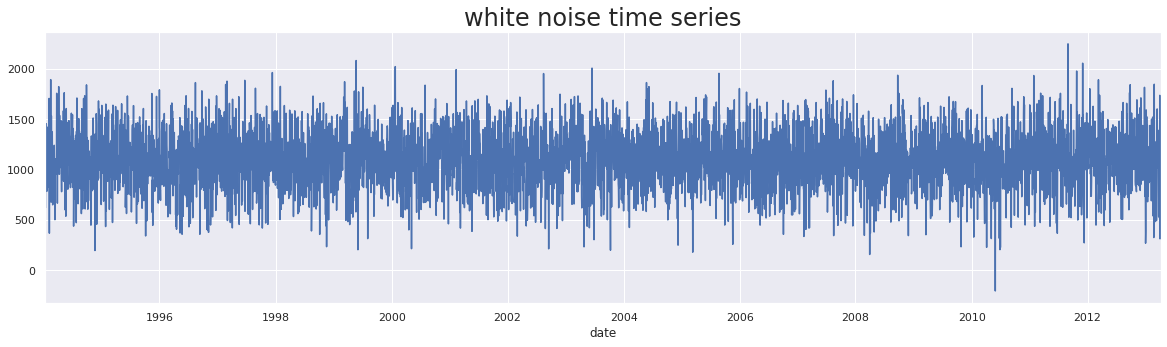

In [12]:
df.wn.plot(figsize=(20,5))
plt.title('white noise time series', size=24)
plt.show()

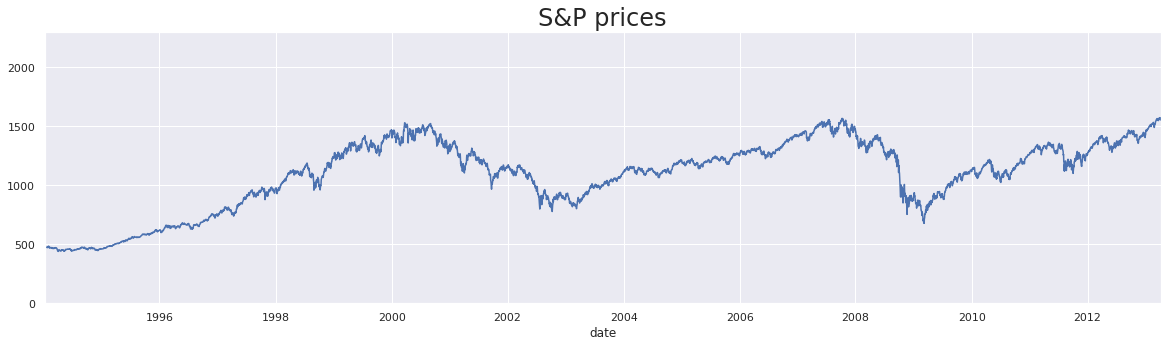

In [13]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P prices', size=24)
plt.ylim(0,2300)
plt.show()

# **Random Walk**

Random walk is a special type of time-series, where values tend to **persist** over the time and the **differences between periods** are simply white noise.

In [14]:
rw = pd.read_csv("/content/drive/MyDrive/Data Science/Time Series/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [15]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [16]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df['rw'] = rw.price
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,wn,rw
date,,,
1994-01-07,469.90,484.311752,1122.139662
1994-01-10,475.27,1585.920151,1080.347860
1994-01-11,474.13,1554.046852,1082.095245
1994-01-12,474.17,617.591839,1083.639265
1994-01-13,472.47,1334.186732,1067.146255


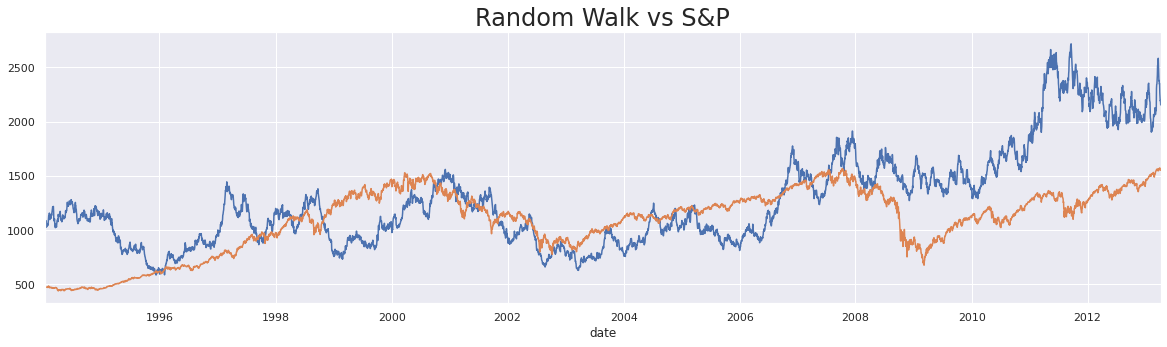

In [18]:
## plot the 'rw' column
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title('Random Walk vs S&P', size=24)
plt.show()

# **Stationarity**

In [19]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In the above code cell output:

**1st line** is the **test statistics**.

**2nd line** shows the **p-value** of the test statistics. It means there is **40%** chance of not rejecting the Null-value.

**3rd line** - no. of **lags** used in the regression. there is some auto correlation in **18** time periods.

**5th to 7th line** are the **critical values** from **Dicky-fuller test**.



# **Seasonality**

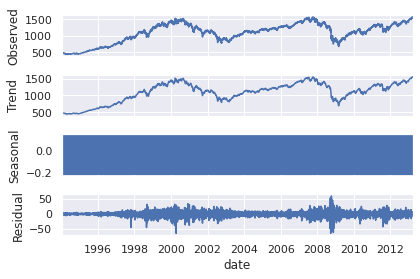

In [23]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

In the above graphs, we can see **Trend** closely resembles to **Observed** series thats because **decomposition function** uses previous period values as trend setter.

The **Seasonal** plot looks like an rectangle because values are constantly oscillating back and forth and the figure size is too small.

**Residuals** are our model's error estimates. the difference between true values and predictions for any period. 

Overall we don't see seasonality of the data.

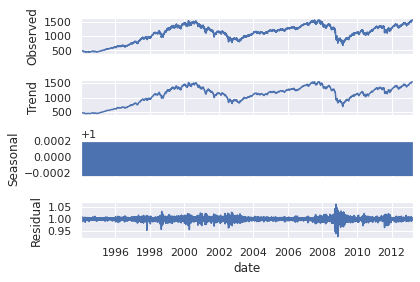

In [24]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

# **Auto-Correlatation Function(ACF)**

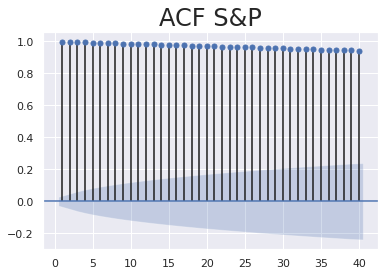

In [25]:
sgt.plot_acf(df.market_value, lags=40, zero=False) # lags=last40 time periods, zero=current time period
plt.title('ACF S&P', size=24)
plt.show()

In the above graph :

**X-axis** - Number of lags

**Y-axis** - Possible values of auto-correlation coefficients. It can take values from **-1 to 1**.

The blue area in X-axis represents **significance**. The values situated outside the blue area suggests **existance** of autocorrelation.

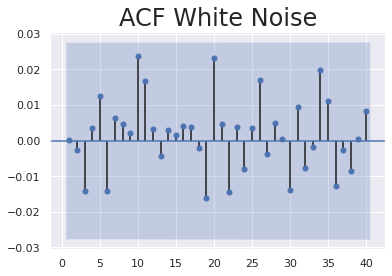

In [26]:
## Let's check this with White Noise
sgt.plot_acf(df.wn, lags=40, zero=False) # lags=last40 time periods, zero=current time period
plt.title('ACF White Noise', size=24)
plt.show()

The above graph shows that we cannot rely on the values of the past periods for time series. No autocorrelation for any lag.


# **Partial Auto-Correlation Function(PACF)**

It cancels out all additional channels a previous period value affects the present one.

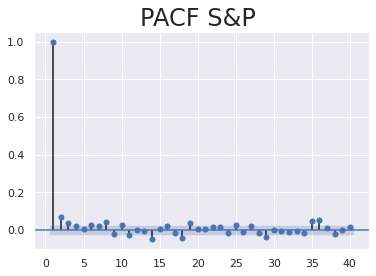

In [27]:
sgt.plot_pacf(df.market_value, lags=40, zero = False, method=('ols'))
plt.title("PACF S&P ", size=24)
plt.show()

We should always remember that ACF and PACF values for the first lag should be identical.

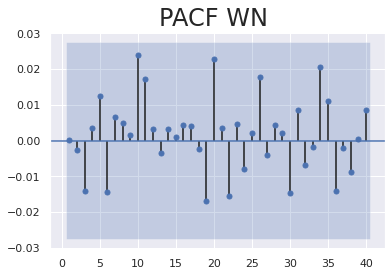

In [28]:
sgt.plot_pacf(df.wn, lags=40, zero = False, method=('ols'))
plt.title("PACF WN ", size=24)
plt.show()